## Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

## Lets Install the Libraries

In [1]:
#!pip install pandas
#!pip install re

## Reading the data

In [2]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import re
pd.set_option('display.max_rows', None)
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
# lets check the column names of the data
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [4]:
# lets check the shape of the data
df.shape

(3044, 10)

## Data Cleaning

### Missing data

In [5]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

### Remove unncessary column

In [6]:
# lets remove Remarks column, as it contains a lot of nans, and high cardinal column
df.drop(columns={'Remarks','Sr No'},inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
dtypes: object(8)
memory usage: 190.4+ KB


### Data cleaning on 'Amount in USD' column

In [8]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

In [9]:
df['Amount in USD'] = df['Amount in USD'].fillna('')
#decimal_rows = df[df['Amount in USD'].str.contains('.', regex=False)]
df['Amount in USD'] = df['Amount in USD'].str.lower().str.strip()
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
# print(df['Amount in USD'].value_counts()) # unknown(1),undisclosed(6),\\\\xc2\\\\xa0,465556+ ,n/a
df['Amount in USD'] = df['Amount in USD'].str.replace('+', '')
df['Amount in USD'] = df['Amount in USD'].replace('unknown', '')
df['Amount in USD'] = df['Amount in USD'].replace('undisclosed', '')
df['Amount in USD'] = df['Amount in USD'].replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['Amount in USD'] = df['Amount in USD'].replace('n/a', '')
df['Amount in USD'] = df['Amount in USD'].str.strip()
df['Amount in USD'].replace('', np.nan, inplace=True)
df['Amount in USD'] = df['Amount in USD'].astype('float')

### Data cleaning on 'Date dd/mm/yyyy' column

In [10]:
## Cleaning the dates
# df['Date dd/mm/yyyy'].value_counts()# 22/01//2015,05/072018 ,\\xc2\\xa010/7/2015,01/07/015,12/05.2015,13/04.2015,15/01.2015
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace('22/01//2015', '22/01/2015')
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace('05/072018', '05/07/2018')
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace('01/07/015', '01/07/2015')
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace('12/05.2015', '12/05/2015')
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace('13/04.2015', '13/04/2015')
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace('15/01.2015', '15/01/2015')
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y')
# df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].dt.strftime('%d-%m-%Y')

### Data cleaning on 'Startup Name' column

In [11]:
## Cleaning the Startup Name
df['Startup Name'] = df['Startup Name'].replace(r'\\\\xe2\\\\x80\\\\x99', '', regex=True)#\\xe2\\x80\\x99
df['Startup Name'] = df['Startup Name'].replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r'\\xe2\\x80\\x99', '', regex=True)#\\xe2\\x80\\x99
df['Startup Name'] = df['Startup Name'].replace(r"\\\\\'", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r"\\\\", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r"'", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r"`", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r".com", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r".co", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r".in", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r".io", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace(r".ai", '', regex=True)
df['Startup Name'] = df['Startup Name'].replace("https://www.wealthbucket/", 'wealthbucket')
df['Startup Name'] = df['Startup Name'].str.lower().str.strip().str.strip('"')

In [12]:
replacements = {
    '1mg': '1mg (healthkartplus)','aahaa': 'aahaa stores','absentia': 'absentia vr','ampere': 'ampere vehicles',
    'arcatron' : 'arcatron mobility','atomberg':'atomberg technology','avail':'avail finance','aye':'aye finance',
    'bankbazaar':'bank bazaar','bhive':'bhive workspace','biteclub':'bite club','black white orange':'black white orange brands',
    'byju':'byjus','caravan craft':'caravan craft retail','chaipoint':'chai point','cloudcherry':'cloudcherry analytics',
    'confirm':'confirmtkt','craft':'craftsvilla','creditmate':'credit mate','creditvidya':'credit vidya','crownit':'crown-it',
    'cult':'cult fitnesss','curefit':'cure fit','cyclops':'cyclops medtech','dailyhunt':'daily hunt','dailyninja':'daily ninja',
    'dailyrounds':'daily rounds','deal 4loans':'deal4loans / wishfin','dhruva':'dhruva space','doctorinsta':'doctor insta',
    'elasti':'elasticrun','entropik':'entropika','fabhotels':'fab hotels','happilyunmarried':'happily unmarried',
    'highradius':'high radius','hike':'hike messenger','i2i':'i2i fung','icustom':'icustom made it','impactguru':'impact guru',
    'indialends':'india lends','inkmonk':'ink monk','intelligencenode':'intelligence node','jollyfoodfellow':'jolly food fellow',
    'little black book':'little black book delhi','mydentist':'my dentist choice','ola':'ola cabs','olacabs':'ola cabs','oyo rooms':'oyo',
    'oyorooms':'oyo','phonepe':'phone pe','pipabella':'pipa bella','policybazaar':'policy bazar','pressplay':'pressplay tv',
    'qyk':'qyk app','rapido':'rapido bike taxi','rollmafia':'roll mafia',
    'samunnati':'samunnati ancialtermedian & services pvt. ltd','satva':'satvakart','shubhloans':'shubh loans',
    'stalkbuylove':'stalk buy love','staydobe':'stayadobe','tokonovan':'tokonovan stuts','tonetag':'tone tag',
    'transerv':'transerve','traveltriangle':'travel triangle','unaacademy':'unacademy','urbanclap':'urbanclap',
    'vahdam tea':'vahdam teas','veritas ance':'veritas ance','vogo automotive':'vogo automotive','vymo':'vyomo',
    'wowexpress':'wow express','zolo':'zolo stays'
    }
def replace_startup_name(startup_name):
    for key in replacements:
        if startup_name.startswith(key):
            return replacements[key]
    return startup_name
df['Startup Name'] = df['Startup Name'].apply(replace_startup_name)
## based on domain knowledge replace required

### Data cleaning on 'Industry Vertical' column

In [13]:
## Cleaning the Industry Vertical column
df['Industry Vertical'] = df['Industry Vertical'].replace(r'\\\\xe2\\\\x80\\\\x99', '', regex=True)#\\xe2\\x80\\x99
df['Industry Vertical'] = df['Industry Vertical'].replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['Industry Vertical'] = df['Industry Vertical'].replace(r'\\xe2\\x80\\x93', '', regex=True)#\\xe2\\x80\\x93
df['Industry Vertical'] = df['Industry Vertical'].replace(r'\\\\xc3\\\\xa', '', regex=True)#\\\\xc3\\\\xa
df['Industry Vertical'] = df['Industry Vertical'].replace(r"'", '', regex=True)
df['Industry Vertical'] = df['Industry Vertical'].replace(r"-", '', regex=True)
df['Industry Vertical'] = df['Industry Vertical'].str.lower().str.strip().str.strip('"')

In [14]:
replacements = {
    'advertising': 'advertising & marketing community networking platform','ag': 'agriculture technology',
    'artificial': 'artificial intelligence platform','auto rickshaw': 'auto rickshaw based services',
    'autorickshaw': 'auto rickshaw based services','b2b': 'b2b platform','beauty':'beauty & lifestyle & wellness platform',
    'big data':'big data & predictive analysis platform','bike':'bike rental platform',
    'branded':'branded food products online sales','budget':'budget hotel accommodation platform',
    'business':'business intelligence & analytics','cab':'cab booking app platform','car ':'car aggregator & retail mobile app',
    'clean':'clean tech','cloud':'cloud platform','clud':'cloud platform','consumer':'consumer goods & internet marketplace',
    'contact':'contact center software platform','credit':'credit management services','custom ':'custom furniture marketplace',
    'customer ':'customer service platform','data ':'data analytics platform','digital ':'digital media platform',
    'doctor':'doctor appointment booking app','ecommerce':'ecommerce platform','edtech':'education platform',
    'education':'education platform','elearning':'education platform','electric':'electric vehicle manufacturer',
    'end':'end to end logistics platform','energy':'energy & environment marketplace','engineering':'engineering services company',
    'enterprise':'enterprise platform','ethnic':'ethnic product ecommerce','event':'event booking platform',
    'fashion':'fashion ecommerce store','fiinance':'financial services platform','financial':'financial services platform',
    'fin':'fintech','fitness':'fitness marketplace','food':'food tech platform','fund raising':'fund raising platform',
    'gourmet':'gourmet meals delivery','grocery':'grocery delivery platform','gym':'gym & fitness','health':'healthcare & fitness platform',
    'home':'home services marketplace','hyperlocal':'hyperlocal shopping app','industrial':'industrial tools marketplace',
    'iot':'internet of things platform','information technology':'it','it':'it','language':'language learning app',
    'last':'last minute booking app','location':'location based app','logistics':'logistics service platform','luxury':'luxury item platform',
    'medical':'medical platform','mobile':'mobile applications','music':'music streaming app','ondemand':'on demand services',
    'on demand':'on demand services','online & mobile':'online & mobile services','online / mobile':'online & mobile services',
    'online budget':'online budget hotel chain','online car':'online car portal','online classifieds':'online classifieds',
    'online education':'education platform','online food':'online food community platform','online furniture':'online furniture marketplace',
    'online grocer':'online grocery delivery','organic food':'organic food ecommerce','payment service':'payment services platform',
    'product discovery':'product discovery & recommendation platform','quick service restaurant chain':'qsr','qsr':'quick service restaurant chain',
    'real estate':'real estate','restaurant':'restaurant reservation platform','saas':'saas','self driven':'self driven rental car platform',
    'selfdriven':'self driven rental car platform','services':'services platform','skill':'skill training & placement platform',
    'social':'social media & network','startup':'startup marketplace','tech':'technology','travel':'travel tech',
    'used':'used vehicle marketplace','waste':'waste management service','wedding':'wedding planning platform',
    'womens':'womens fashion wear portal'    
}
def replace_industry_vertical(industry_vertical):
    for key in replacements:
        if industry_vertical.startswith(key):
            return replacements[key]
    return industry_vertical
df['Industry Vertical'] = df['Industry Vertical'].astype(str)
df['Industry Vertical'] = df['Industry Vertical'].apply(replace_industry_vertical)

In [15]:
# based on domain knowledge replacee required

### Data cleaning on 'SubVertical' column

In [16]:
## Cleaning the SubVertical column
df['SubVertical'] = df['SubVertical'].replace(r'\\\\xe2\\\\x80\\\\x99', '', regex=True)#\\xe2\\x80\\x99
df['SubVertical'] = df['SubVertical'].replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['SubVertical'] = df['SubVertical'].replace(r'\\xe2\\x80\\x93', '', regex=True)#\\xe2\\x80\\x93
df['SubVertical'] = df['SubVertical'].replace(r'\\\\xc3\\\\xa', '', regex=True)#\\\\xc3\\\\xa
df['SubVertical'] = df['SubVertical'].replace(r"'", '', regex=True)
df['SubVertical'] = df['SubVertical'].replace(r"-", '', regex=True)
df['SubVertical'] = df['SubVertical'].str.lower().str.strip().str.strip('"')

In [17]:
# based on domain knowledge replacee required

### Data cleaning on 'City  Location' column

In [18]:
## Cleaning the City  Location column
df['City  Location'] = df['City  Location'].replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['City  Location'] = df['City  Location'].str.lower().str.strip().str.strip('"')
df['City  Location'] = df['City  Location'].replace(r'bangalore', 'bengaluru', regex=True)
df['City  Location'] = df['City  Location'].replace('san jose,','san jose')
df['City  Location'] = df['City  Location'].replace({'gurgaon':'gurugram',
                                                   'delhi':'new delhi',
                                                    'ahemadabad':'ahmedabad',
                                                    'ahemdabad':'ahmedabad',
                                                    'bhubneswar':'bhubaneswar',
                                                    'kolkatta':'kolkata',
                                                    'nw delhi':'new delhi'})
df['City  Location'] = df['City  Location'].replace('bengaluru and gurugram','bengaluru/gurugram')
df['City  Location'] = df['City  Location'].astype(str)
df['num_locations'] = df['City  Location'].apply(lambda x: len([loc.strip() for loc in re.split(r'[\/&\,]', x)]))#'/', '&', ','
# df[df['num_locations']==1]['City  Location'].unique()

### Data cleaning on 'InvestmentnType' column

In [19]:
## Cleaning the InvestmentnType column
df['InvestmentnType'] = df['InvestmentnType'].str.lower().str.strip()
df['InvestmentnType'] = df['InvestmentnType'].replace(r"-", ' ', regex=True)
df['InvestmentnType'] = df['InvestmentnType'].replace(r"\\\\n", ' ', regex=True)
df['InvestmentnType'] = df['InvestmentnType'].astype(str)
replacements = {
    'angel': 'angel / seed funding',
    'seed': 'angel / seed funding',
    'debt': 'debt funding',
    'equity': 'equity based funding',
    'private': 'private equity funding',
    'venture': 'venture series'
}
def replace_investment_type(investment_type):
    for key in replacements:
        if investment_type.startswith(key):
            return replacements[key]
        if investment_type.endswith(key):
            return replacements[key]
    return investment_type
df['InvestmentnType'] = df['InvestmentnType'].apply(replace_investment_type)

In [20]:
df['Startup Name'] = df['Startup Name'].str.title()
df['Industry Vertical'] = df['Industry Vertical'].str.title()
df['SubVertical'] = df['SubVertical'].str.title()
df['City  Location'] = df['City  Location'].str.title()
df['Investors Name'] = df['Investors Name'].str.title()
df['InvestmentnType'] = df['InvestmentnType'].str.title()
df = df[['Date dd/mm/yyyy','Investors Name','Startup Name','Industry Vertical','SubVertical','InvestmentnType','Amount in USD',
   'City  Location','num_locations']]

### Drop unncessary records

In [21]:
df.isnull().sum()

Date dd/mm/yyyy        0
Investors Name        24
Startup Name           0
Industry Vertical      0
SubVertical          936
InvestmentnType        0
Amount in USD        971
City  Location         0
num_locations          0
dtype: int64

In [22]:
df.shape

(3044, 9)

In [23]:
df = df.dropna(subset=['Amount in USD'])

In [24]:
df.shape

(2073, 9)

In [25]:
df = df.dropna(subset=['Investors Name'])

In [26]:
df.shape

(2053, 9)

In [27]:
df.isnull().sum()

Date dd/mm/yyyy        0
Investors Name         0
Startup Name           0
Industry Vertical      0
SubVertical          649
InvestmentnType        0
Amount in USD          0
City  Location         0
num_locations          0
dtype: int64

In [28]:
# df = df.dropna(subset=['SubVertical'])

In [29]:
# convert Amount in USD column in crore
df['Amount in USD'] = df['Amount in USD']/10000000

# Data Analysis

## How Does the Funding Ecosystem changes with respect to Time?

In [30]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

In [31]:
df['Month-Year'] = df['Date dd/mm/yyyy'].dt.to_period('M')
df2 = df.groupby('Month-Year')['Amount in USD'].sum().reset_index()
df2.head()

,Month-Year,Amount in USD
0,2015-01,37.017177
1,2015-02,39.426260
2,2015-03,46.332700
3,2015-04,98.000000
4,2015-05,32.618500


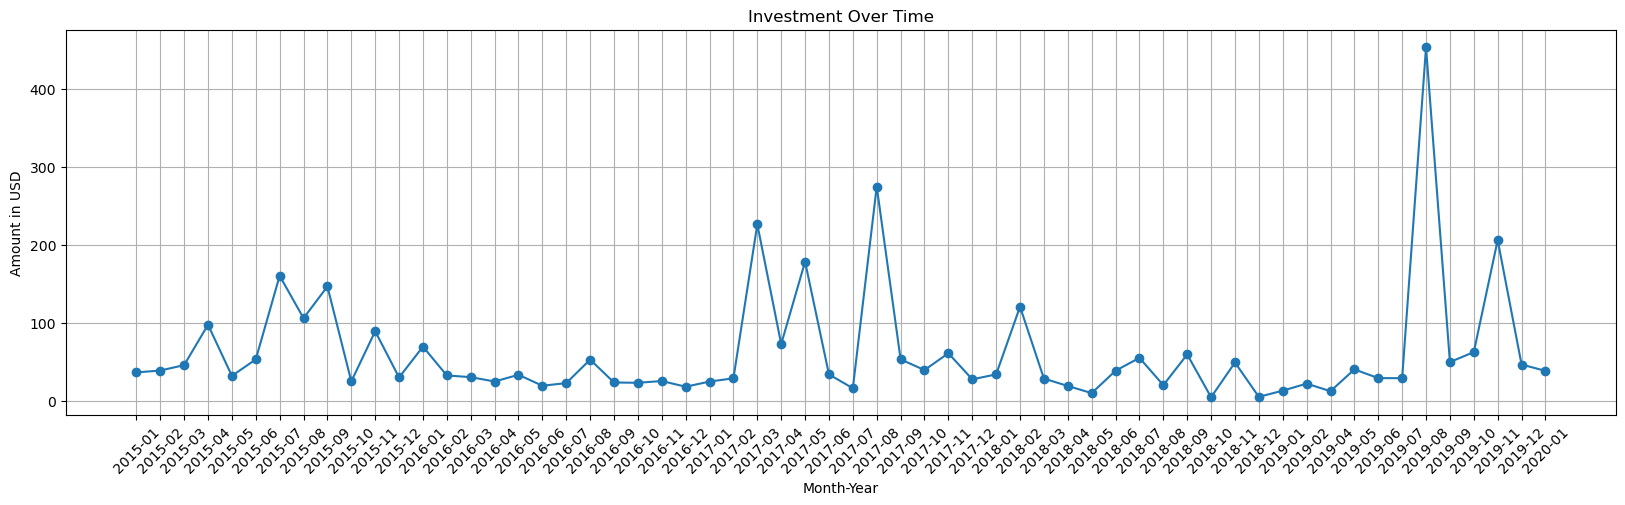

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(df2['Month-Year'].astype(str), df2['Amount in USD'], marker='o')
plt.title('Investment Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
df['Year'] = df['Date dd/mm/yyyy'].dt.year
df2 = df.groupby('Year')['Amount in USD'].sum().reset_index()
df2

,Year,Amount in USD
0,2015,866.820237
1,2016,382.808861
2,2017,1042.660973
3,2018,451.328242
4,2019,969.341854
5,2020,39.020725


## What is the General Amount that Startups get in India?

In [34]:
# lets check the Maximum funding of a startup

In [35]:
df[df['Amount in USD'] == df['Amount in USD'].max()]

,Date dd/mm/yyyy,Investors Name,Startup Name,Industry Vertical,SubVertical,InvestmentnType,Amount in USD,City Location,num_locations,Month-Year,Year
60,2019-08-27,Westbridge Capital,Rapido Bike Taxi,Transportation,Bike Taxi,Series B,390.0,Bengaluru,1,2019-08,2019


In [36]:
# lets check the startups with more than 50crore+ funding

In [37]:
df[df['Amount in USD'] >= 5]

,Date dd/mm/yyyy,Investors Name,Startup Name,Industry Vertical,SubVertical,InvestmentnType,Amount in USD,City Location,num_locations,Month-Year,Year
0,2020-01-09,Tiger Global Management,Byjus,Etech,Elearning,Private Equity Funding,20.00,Bengaluru,1,2020-01,2020
6,2020-01-10,Ant Financial,Zomato,Hospitality,Online Food Delivery Platform,Private Equity Funding,15.00,Gurugram,1,2020-01,2020
8,2019-12-06,Ping An Global Voyager Fund,Cardekho,Ecommerce Platform,Automobile,Series D,7.00,Gurugram,1,2019-12,2019
9,2019-12-03,"Mumbai Angels, Ravikanth Reddy",Dhruva Space,Aerospace,Satellite Communication,Angel / Seed Funding,5.00,Bengaluru,1,2019-12,2019
15,2019-12-11,Manipal Education And Medical Group (Memg),R Games,Gaming,Real Money Based Gaming Startup,Angel / Seed Funding,5.00,Noida,1,2019-12,2019
16,2019-12-20,Softbank Vision Fund,Lenskart,Ecommerce Platform,Online Eyewear Shopping Portal,Series G,23.10,Faridabad,1,2019-12,2019
17,2019-11-13,"Sequoia, Capitalg, Accel",Freshworks,Software,Business And Customer Engagement Tools,Series H,15.00,San Francisco,1,2019-11,2019
25,2019-11-20,"Altimeter Capital, Sutter Hill Ventures",Clu,Saas,Recovery Software,Series C,13.50,San Jose,1,2019-11,2019
27,2019-11-19,Amour Infrastructure,Digital Mall Asia,Ecommerce Platform,Virtual Ecommerce Platform,Angel / Seed Funding,22.00,New Delhi,1,2019-11,2019
29,2019-11-15,"Matrix Partners, Stellaris Venture Partners, K...",Vogo Automotive,Last Minute Booking App,Scooter Sharing App,Series B,28.30,Kormangala,1,2019-11,2019


In [38]:
# lets check out different ventures of Paytm

In [39]:
df[df['Investors Name'].str.contains('Paytm')]

,Date dd/mm/yyyy,Investors Name,Startup Name,Industry Vertical,SubVertical,InvestmentnType,Amount in USD,City Location,num_locations,Month-Year,Year
11,2019-12-17,"Paytm, Nptk, Sabre Partners And Neoplux",Healthians,B2B Platform,Food Solutions For Corporate,Series C,1.2000,Bengaluru,1,2019-12,2019
761,2017-06-20,Paytm,Insider,Consumer Goods & Internet Marketplace,Events Ticketing Platform,Equity Based Funding,0.5200,Mumbai,1,2017-06,2017
1784,2016-04-18,Paytm & Existing Investors,Jugnoo,Consumer Goods & Internet Marketplace,Ondemand Delivery & Logistics Platform,Equity Based Funding,1.0000,Chandigarh,1,2016-04,2016
2381,2015-10-31,Paytm,Jugnoo,Auto Rickshaw Based Services,NaN,Equity Based Funding,1.0000,Chandigarh,1,2015-10,2015
2405,2015-09-10,"Nanadan Nilekani, Inmobi, Paytm",The/Nudge Foundan,Non Profit Organization To Alleviate Poverty,NaN,Angel / Seed Funding,0.0315,Bengaluru,1,2015-09,2015
2445,2015-09-22,Paytm,Loginext,End To End Logistics Platform,NaN,Equity Based Funding,1.0000,Mumbai,1,2015-09,2015
2653,2015-07-29,"Paytm, Saif Partners,\\Xc2\\Xa0 Tiger Global M...",Zovi / Little App,Hyperlocal Shopping App,NaN,Equity Based Funding,5.0000,Bengaluru,1,2015-07,2015
2692,2015-06-05,"Snow Leopard, Paytm",Jugnoo,Auto Rickshaw Based Services,NaN,Equity Based Funding,0.5000,Chandigarh,1,2015-06,2015


In [40]:
# lets check out different ventures of Flipkart

In [41]:
df[df['Investors Name'].str.contains('Flipkart')]

,Date dd/mm/yyyy,Investors Name,Startup Name,Industry Vertical,SubVertical,InvestmentnType,Amount in USD,City Location,num_locations,Month-Year,Year
173,2018-08-08,Flipkart,Phone Pe,Consumer Goods & Internet Marketplace,Upi Payments App,Equity Based Funding,6.600,Bengaluru,1,2018-08,2018
526,2017-10-04,Flipkart,Phone Pe,Consumer Goods & Internet Marketplace,Digital Wallet,Equity Based Funding,3.870,Bengaluru,1,2017-10,2017
1042,2017-02-28,"Sands Capital, Ifc, Accel Partners, Flipkart, ...",Blackbuck,Logistics Service Platform,Online Freight Aggregator,Equity Based Funding,7.000,Bengaluru,1,2017-02,2017
1072,2017-01-17,Flipkart,Ystep,Consumer Goods & Internet Marketplace,Parenting Info & Social Network,Equity Based Funding,0.200,Bengaluru,1,2017-01,2017
1400,2016-09-27,Flipkart Logistics Pvt. Ltd,Ystep,Consumer Goods & Internet Marketplace,Parenting Network Platform,Equity Based Funding,0.158,Bengaluru,1,2016-09,2016
2140,2015-12-10,"Tiger Global Management, Yuri Milner, Apoletto...",Blackbuck,Online Freight Services Aggregator,NaN,Equity Based Funding,2.500,Bengaluru,1,2015-12,2015
2186,2015-12-23,"Blume Ventures, Flipkart",Mech Mocha,Mobile Applications,NaN,Angel / Seed Funding,0.100,Bengaluru,1,2015-12,2015
2286,2015-11-30,"Flipkart, Accel Partners, Delhivery, Foxconn",Qikpod,Ecommerce Platform,NaN,Equity Based Funding,0.900,Bengaluru,1,2015-11,2015
2313,2015-10-08,"Tiger Global Management, Flipkart",Cube26,Gesture Based Mobile Development,NaN,Equity Based Funding,0.770,New Delhi,1,2015-10,2015
2631,2015-07-23,"Flipkart, Tiger Global",Nestaway,Luxury Item Platform,NaN,Equity Based Funding,1.275,Bengaluru,1,2015-07,2015


In [42]:
# lets check the minimum funding in a startup

In [43]:
df[df['Amount in USD'] == df['Amount in USD'].min()]

,Date dd/mm/yyyy,Investors Name,Startup Name,Industry Vertical,SubVertical,InvestmentnType,Amount in USD,City Location,num_locations,Month-Year,Year
3017,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Hostel Dunia,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3018,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Play Your Sport,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3019,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Yo Grad,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3020,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Enabli,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3021,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Cbs,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015


In [44]:
# lets check the startups with least funding

In [45]:
df[df['Amount in USD'] == df['Amount in USD'].min()]

,Date dd/mm/yyyy,Investors Name,Startup Name,Industry Vertical,SubVertical,InvestmentnType,Amount in USD,City Location,num_locations,Month-Year,Year
3017,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Hostel Dunia,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3018,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Play Your Sport,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3019,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Yo Grad,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3020,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Enabli,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015
3021,2015-01-19,Hyderabad Angels (At Startup Heroes Event),Cbs,Nan,NaN,Angel / Seed Funding,0.0016,Nan,1,2015-01,2015


In [46]:
df2 = df.groupby('InvestmentnType')['Amount in USD'].sum().reset_index()
df2.sort_values('Amount in USD',ascending = False)

,InvestmentnType,Amount in USD
4,Equity Based Funding,2625.861816
13,Series B,479.919574
16,Series D,148.179900
15,Series C,104.471839
0,Angel / Seed Funding,104.302557
5,Funding Round,100.000000
11,Private Equity Funding,53.638000
19,Series G,23.100000
9,Nan,20.762901
12,Series A,20.320000


In [47]:
# Average Funding

In [48]:
df['Amount in USD'].mean()

1.8275601029332684

In [49]:
df2 = df.groupby('InvestmentnType')['Amount in USD'].mean().reset_index()
df2.sort_values('Amount in USD',ascending = False)

,InvestmentnType,Amount in USD
5,Funding Round,100.000000
13,Series B,23.995979
19,Series G,23.100000
20,Series H,15.000000
16,Series D,12.348325
11,Private Equity Funding,8.939667
15,Series C,7.462274
9,Nan,6.920967
18,Series F,4.500000
23,Venture Series,4.021715


In [50]:
# lets check the no. of funding each startsup got

In [51]:
df['Startup Name'].value_counts()

Startup Name
Ola Cabs                                         12
Oyo                                               9
Swiggy                                            8
Aye Finance                                       8
Urbanclap                                         6
Blackbuck                                         6
Flipkart                                          6
Toppr                                             6
Byjus                                             6
Lengkart                                          6
Nykaa                                             5
Unacademy                                         5
Cure Fit                                          5
Holachef                                          5
Mefi                                              5
Capital Float                                     5
Grofers                                           5
Paytm                                             5
Coverfox                                          5

## Which Kind of Industries are more preferred for Startups?

In [52]:
# lets analyze the Industry of the Startups

In [53]:
df['Industry Vertical'].value_counts()

Industry Vertical
Consumer Goods & Internet Marketplace                        588
Technology                                                   314
Ecommerce Platform                                           214
Nan                                                          131
Fintech                                                       71
Healthcare & Fitness Platform                                 61
Education Platform                                            45
Food Tech Platform                                            37
Logistics Service Platform                                    34
Mobile Applications                                           27
Hyperlocal Shopping App                                       23
Online Food Community Platform                                14
It                                                            13
On Demand Services                                            12
Digital Media Platform                                        10
Home Se

In [54]:
# lets analyze the sub vertical industries

In [55]:
df['SubVertical'].value_counts()

SubVertical
Online Lending Platform                                                                                  19
Online Learning Platform                                                                                  7
Online Lending                                                                                            5
Online Marketplace                                                                                        5
Agritech                                                                                                  5
Online Pharmacy                                                                                           5
Education                                                                                                 5
Elearning                                                                                                 4
Ecommerce Marketplace                                                                                     4
Online Education

## Does Location also play a role, In determining the Growth of a Startup?

In [56]:
# analyzing the effect of Cities on a Startup

In [57]:
df['City  Location'].value_counts()

City  Location
Bengaluru                579
Mumbai                   393
New Delhi                264
Gurugram                 243
Nan                      135
Chennai                   75
Hyderabad                 72
Pune                      71
Noida                     56
Ahmedabad                 28
Jaipur                    14
Kolkata                   10
Goa                        7
Vadodara                   6
Singapore                  6
Chandigarh                 6
Indore                     5
Coimbatore                 4
Pune / Us                  4
Bhopal                     3
Bengaluru/ Bangkok         2
Faridabad                  2
India/Us                   2
Bengaluru / Sfo            2
Mumbai/Bengaluru           2
Kanpur                     2
New Delhi / Us             2
San Francisco              2
Kormangala                 2
Gwalior                    2
Pune / Dubai               1
Sfo / Bengaluru            1
Trivandrum                 1
Lucknow                    1

In [58]:
df2 = df.groupby('City  Location')['Amount in USD'].sum().reset_index()
df2.sort_values('Amount in USD',ascending = False)

,City Location,Amount in USD
4,Bengaluru,1848.430886
45,Mumbai,432.794001
25,Gurugram,387.691366
53,New Delhi,329.817538
58,Noida,128.286400
52,Nan,127.186387
18,Chennai,71.876700
62,Pune,63.308200
43,Menlo Park,45.000000
28,Hyderabad,40.107623


## Who plays the main role in Indian Startups Ecosystem?

In [59]:
# lets analyze the investors on startups

In [60]:
df['Investors Name'].value_counts()

Investors Name
Undisclosed Investors                                                                                                                                                          64
Undisclosed Investor                                                                                                                                                           20
Group Of Angel Investors                                                                                                                                                       16
Kalaari Capital                                                                                                                                                                13
Sequoia Capital                                                                                                                                                                13
Indian Angel Network                                                                           

## What are the different Types of Funding for Startups?

In [61]:
# lets analyze the investment

In [62]:
df['InvestmentnType'].value_counts()

InvestmentnType
Equity Based Funding      1073
Angel / Seed Funding       849
Debt Funding                26
Series A                    22
Series B                    20
Series C                    14
Series D                    12
Pre Series A                 8
Private Equity Funding       6
Venture Series               4
Nan                          3
Series E                     2
Series F                     2
Crowd Funding                2
Series H                     1
Series G                     1
Funding Round                1
Maiden Round                 1
Corporate Round              1
Series J                     1
Inhouse Funding              1
Mezzanine                    1
Series B (Extension)         1
Term Loan                    1
Name: count, dtype: int64